In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa

In [4]:
train_data = []
folder_path = './musdb18/train/'
for file in os.listdir(folder_path):
    if file.endswith('.wav'):
        audio_path = os.path.join(folder_path, file)
        y, sr = librosa.load(audio_path, sr=None)
        train_data.append(y)

In [5]:
train_data

[array([ 0.00889587,  0.02452087,  0.04592896, ..., -0.0007782 ,
        -0.00082397, -0.00056458], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.02355957, 0.02781677, 0.02351379, ..., 0.00111389, 0.00137329,
        0.00169373], dtype=float32),
 array([-0.00202942, -0.00233459, -0.00074768, ...,  0.        ,
         0.        ,  0.        ], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([3.0517578e-05, 9.1552734e-05, 3.0517578e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.00021362, 0.00024414, 0.0002594 , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([-0.05569458, -0.06889343, -0.06658936, ...,  0.        ,
         0.        ,  0.        ], dtype=float32),
 array([-0.01576233, -0.02218628, -0.01930237, ...,  0.        ,
         0.        ,  0.        ], dtype=float32),
 array([0., 0., 0., ..., 0

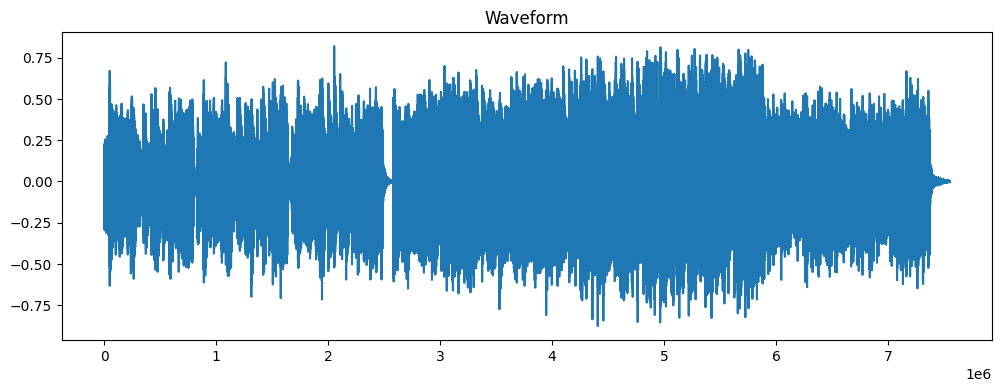

In [6]:
# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(train_data[0])
plt.title('Waveform')
plt.show()

In [9]:
test_data = []
folder_path = './musdb18/test/'
for file in os.listdir(folder_path):
    if file.endswith('.wav'):
        audio_path = os.path.join(folder_path, file)
        y, sr = librosa.load(audio_path, sr=None)
        test_data.append(y)

In [10]:
test_data

[array([-1.5258789e-05, -3.0517578e-05,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.5258789e-05, -1.5258789e-05, -1.5258789e-05], dtype=float32),
 array([ 0.0000000e+00, -1.5258789e-05,  0.0000000e+00, ...,
         0.0000000e+00, -1.5258789e-05,  0.0000000e+00], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([4.5776367e-05, 7.6293945e-05, 7.6293945e-05, ..., 1.2207031e-04,
        1.2207031e-04, 1.2207031e-04], dtype=float32),
 array([-0.00708008, -0.01522827, -0.02069092, ...,  0.        ,
         0.        ,  0.        ], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([-1.5258789e-05, -1.5258789e-05,  6.1035156e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 arr

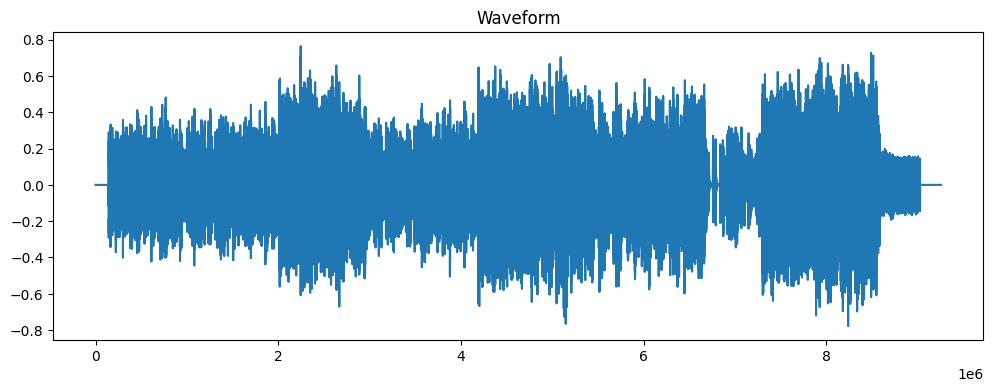

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(test_data[0])
plt.title('Waveform')
plt.show()

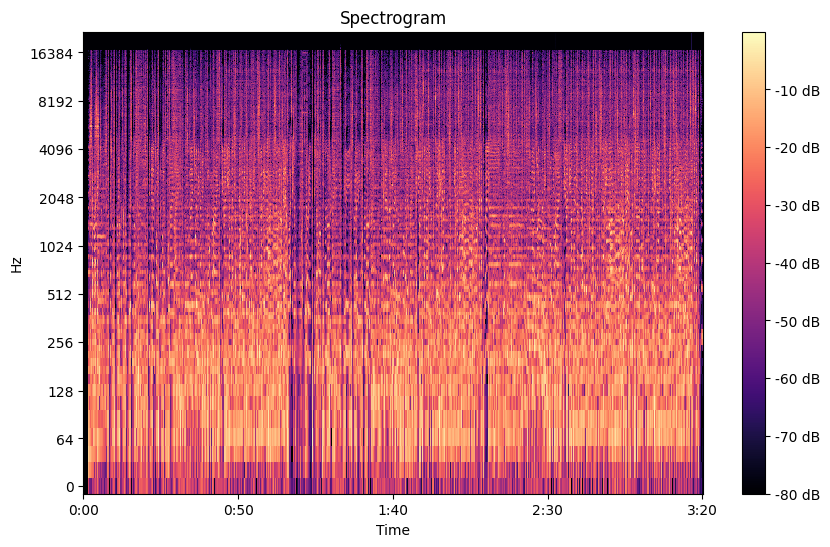

In [23]:
def audio_to_spectrogram(y, sr, n_fft=2048, hop_length=512):
    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    return S_db

def spectrogram_to_audio(S_db, sr, n_fft=2048, hop_length=512):
    S = librosa.db_to_amplitude(S_db)
    y = librosa.istft(S, hop_length=hop_length)
    return y

# Load an example audio file
y, sr = librosa.load('musdb18/test/Al James - Schoolboy Facination.stem.wav', sr=None)

# Convert to spectrogram
S_db = audio_to_spectrogram(y, sr)

# Display the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+1.0f dB')
plt.title('Spectrogram')
plt.show()
